# Underfitting vs. Overfitting

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [99]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

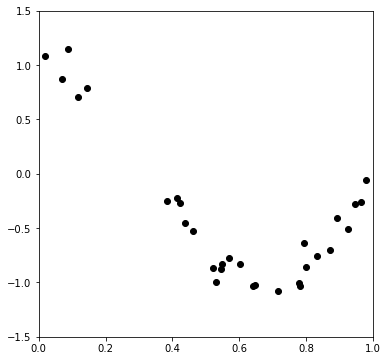

In [100]:
# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y, color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

Podziel dane na dwie grupy.

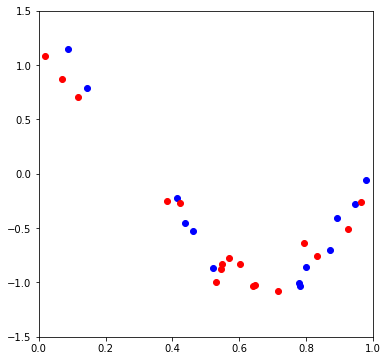

In [101]:
s=np.random.random_sample(n_samples)
s[s>0.5]=1
s[s<=0.5]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:

* liniową
* wielomianową stopnia 20

w każdej z grup.

In [102]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import  metrics

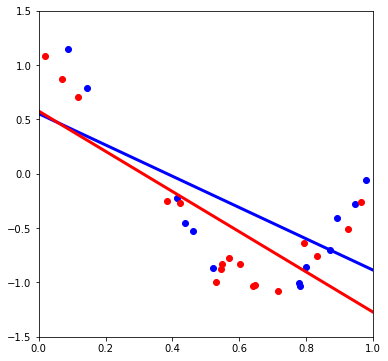

In [103]:
X1 = np.vstack(X1)
X2 = np.vstack(X2)

x_lin = np.vstack(np.linspace(0, 10, 100))

model1 = LinearRegression()
model1.fit(X1, y1)

model2 = LinearRegression()
model2.fit(X2, y2)


plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.plot(x_lin, model1.predict(x_lin), color='blue',linewidth=3)
plt.scatter(X2, y2,  color='red')
plt.plot(x_lin, model2.predict(x_lin), color='red',linewidth=3)
x_tr = np.linspace(0, 1, 200)
plt.show()


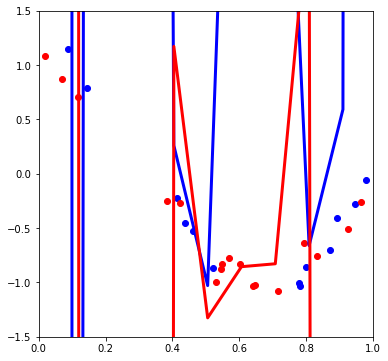

In [104]:
x_lin = np.vstack(np.linspace(0, 10, 100))

model3 = make_pipeline(PolynomialFeatures(20), LinearRegression())
model3.fit(X1, y1)

model4 = make_pipeline(PolynomialFeatures(20), LinearRegression())
model4.fit(X2, y2)

plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.plot(x_lin, model3.predict(x_lin), color='blue',linewidth=3)
plt.scatter(X2, y2,  color='red')
plt.plot(x_lin, model4.predict(x_lin), color='red',linewidth=3)
x_tr = np.linspace(0, 1, 200)
plt.show()


# Zadanie
Wykonaj 100 podziałów na dwie równe części. Za każdym razem naucz regresję:

* liniową
* wielomianową stopnia 1, 2, 3, 4, 5, 6

na jednym fragmęcie i policz R_square na drugim.
Zwizualizuj wynik.


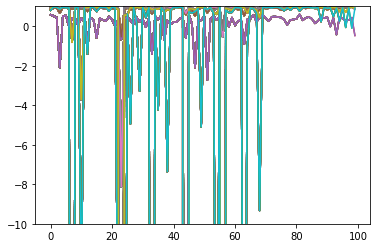

In [105]:
def random_split(n_samples):
    s=np.random.random_sample(n_samples)
    s[s>0.5]=1
    s[s<=0.5]=0
    X1=X[s==1]
    y1=y[s==1]
    X2=X[s==0]
    y2=y[s==0]
    return [X1, y1, X2, y2]

x_lin = np.vstack(np.linspace(0, 10, 100))

polynomial_array = [1,2,3,4,5,6]

df = pd.DataFrame(columns=['linear_model','polynomial1','polynomial2','polynomial3','polynomial4','polynomial5','polynomial6'])

for i in range(100):
    X1, y1, X2, y2 = random_split(n_samples)
    X1 = np.vstack(X1)
    X2 = np.vstack(X2)
    metric_list = []

    linear_model = LinearRegression()
    linear_model.fit(X1, y1)

    linear_metric = metrics.r2_score(y2, linear_model.predict(X2))
    metric_list.append(linear_metric)
    
    for i in polynomial_array:
        curr_model = make_pipeline(PolynomialFeatures(i), LinearRegression())
        curr_model.fit(X1, y1)
        
        metric_list.append(metrics.r2_score(y2, curr_model.predict(X2)))
    
    df2 = {'linear_model': metric_list[0], 'polynomial1': metric_list[1], 'polynomial2':metric_list[2],'polynomial3': metric_list[3], 'polynomial4':metric_list[4], 'polynomial5':metric_list[5], 'polynomial6':metric_list[6] }
    
    df = df.append(df2, ignore_index = True)
    
    plt.plot(df.linear_model)
    plt.plot(df.polynomial1)
    plt.plot(df.polynomial2)
    plt.plot(df.polynomial3)
    plt.plot(df.polynomial4)
    plt.plot(df.polynomial5)
    plt.plot(df.polynomial6)
    
    plt.ylim((-10,1))